In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as mtick

In [22]:
lme = pd.read_csv("metal_oil.csv", index_col=0, parse_dates=True, usecols=[0,1])
oil = pd.read_csv("metal_oil.csv", index_col=0, parse_dates=True, usecols=[2,3])

In [23]:
oil.dropna(inplace=True)
oil.reset_index(inplace=True)
lme.reset_index(inplace=True)

In [24]:
oil.rename(columns={"Date.1": "Date"}, inplace=True)

In [25]:
merged = pd.merge(lme, oil, how='inner', on='Date')

In [26]:
merged.set_index("Date", inplace=True)

In [27]:
merged.rename(columns={"Price": "LME Index", "WTI": "WTI Crude"}, inplace=True)

In [28]:
merged

,LME Index,WTI Crude
Date,,
2022-02-04,4691.4,92.31
2022-02-03,4677.2,90.27
2022-02-02,4664.8,88.26
2022-02-01,4641.3,88.20
2022-01-28,4600.6,86.82
...,...,...
2020-02-07,2638.5,50.34
2020-02-06,2678.8,50.94
2020-02-05,2668.3,50.87


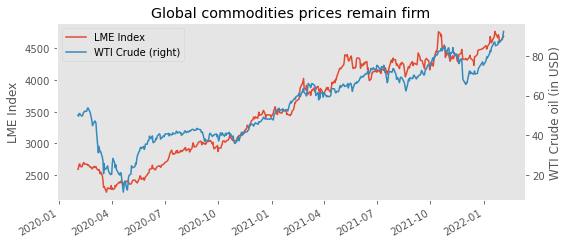

In [31]:
ax = merged.plot(secondary_y="WTI Crude", figsize=(8,3.5), x_compat=True)

ax.grid(visible=False)
plt.grid(visible=False)

plt.title("Global commodities prices remain firm")

ax.set_xlabel("")

ax.right_ax.set_ylabel("WTI Crude oil (in USD)")
ax.set_ylabel("LME Index")

# ax.legend(loc='lower center', bbox_to_anchor=(0.25, -0.5), fancybox=True, ncol=2)
# plt.legend(loc='lower center', bbox_to_anchor=(1, -0.5), fancybox=True, ncol=2)

plt.tight_layout()
plt.savefig("cow6feb.png", dpi=300)

In [53]:
com = pd.read_excel("com6feb.xlsx", index_col=0, parse_dates=True, usecols=[0,1])

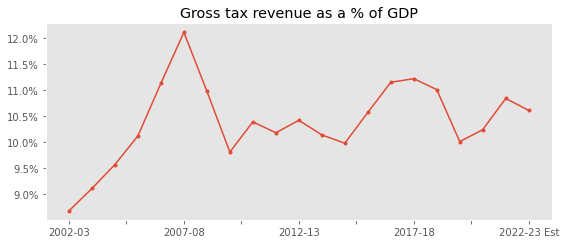

In [55]:
ax = com.iloc[-21:]['Gross tax revenue as a % of GDP'].plot(figsize=(8,3.5), x_compat=True, marker='.')

plt.title("Gross tax revenue as a % of GDP")

plt.grid(visible=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))

# plt.xlabel("\n Figure for 2022-23 is estimated with a 12% nominal GDP hike", fontsize=9)
plt.xlabel("")
plt.tight_layout()
plt.savefig("com6feb.png", dpi=300)